In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy as np
import pandas as pd 
from os import path
from numpy.linalg import norm
from cmaps import *
import matplotlib.ticker as mticker 

alex_dir = "../../data/alex_data/"

def get_dir(thermal, l, delta, beta):
	fn = "Thermal_Data" if thermal else "Zero_Temp_Data"

	if thermal:
		fn = path.join(fn, 
				f"Cormat_Data_L={l}_Delta={delta}_Spectral_Depth=20_beta={beta}")
	else: 
		fn = path.join(fn, f"Cormat_Data_L={l}_Delta={delta}")

	fn = path.join(alex_dir, fn)

	return fn


def get_eigen(thermal, l, delta, beta, trunc):
	fn = get_dir(thermal, l, delta, beta)
	fn = path.join(fn, f"Truncations={trunc}")
	evecs = np.genfromtxt(path.join(fn, 'Eigvecs.txt'), delimiter='\t')
	evals = np.genfromtxt(path.join(fn, 'Eigvals.txt'), delimiter='\t')
	
	if np.shape(evals) == (): 
		evals = np.array([evals])
	return evals, evecs


def get_hamiltonian(l, delta, beta): 
	fn = get_dir(True, l, delta, beta)
	fn = path.join(fn, "Extra_Data")

	h = np.genfromtxt(path.join(fn, 'Hvec.txt'), delimiter='\t')
	
	return h 

def get_boltzmann(l, delta, beta): 
	fn = get_dir(True, l, delta, beta)
	fn = path.join(fn, "Extra_Data")

	h = np.genfromtxt(path.join(fn, 'Boltzmann_weights.txt'), delimiter='\t')
	
	return h 


def get_spectrum(l, delta, beta):
	fn = get_dir(True, l, delta, beta)
	fn = path.join(fn, "Extra_Data")

	h = np.genfromtxt(path.join(fn, 'Raw_Spectrum.txt'), delimiter='\t')
	
	return h 

In [7]:
l = 18
deltas = [2, 3, 4, 5, 6]

lowest_evals = {}
for delta in deltas: 
	truncs = np.arange(2, int(l / 2))
	zero_temp_evals = []
	for trunc in truncs:
		evals, evecs = get_eigen(False, l, delta, 0, trunc)
		zero_temp_evals.append(evals[0])
	lowest_evals[delta] = zero_temp_evals

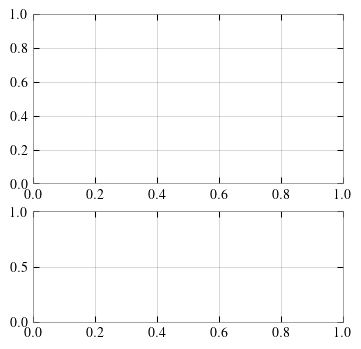

In [8]:
fig, ax = plt.subplots(figsize=(4, 4), nrows=2, gridspec_kw={'height_ratios': [2, 1.3]})

cmap = get_continuous_cmap([
	'#632a70',
	'#534699', 
	'#3b739c',
	'#21908d',
	'#35b779',
	'#94cf55',
	'#eddd47'
	]).resampled(len(deltas))
norm = mpl.colors.Normalize(vmax=deltas[-1], vmin=deltas[0])

In [9]:
factors = {
	1: 1,
	2: 2, 
	3: 3, 
	4: 4,
	5: 5, 
	6: 6, 
}

for delta in lowest_evals.keys():
	r = np.linspace(truncs[0], truncs[-1], 100)
	ax[0].plot(r, factors[delta] / np.power(r, 2 * delta), color='grey', 
        	linestyle='dashed', alpha=0.5)
	ax[0].scatter(np.flip(truncs), lowest_evals[delta], label=delta, alpha=0.8,
	    	color=cmap(norm(delta)))

# ax.legend()
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xticks(truncs)
# Do not use scientific notation for x axis
ax[0].xaxis.set_major_formatter(mticker.ScalarFormatter())

In [10]:
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), location='right', 
		    ticks=deltas, ax=ax.ravel().tolist(), aspect=20, shrink=0.6)
cbar.set_label('$\delta$')
cbar.ax.tick_params(size=0)


In [11]:
ax[1].clear()
for delta in lowest_evals.keys():
	ax[1].plot(np.flip(truncs), lowest_evals[delta] * np.power(np.flip(truncs), 2 * delta), label=delta, alpha=0.8,
	    	color=cmap(norm(delta)))
ax[1].set_yscale('log')
ax[1].set_xticks(truncs)
ax[1].set_ylim(0.3, 50)

(0.3, 50)

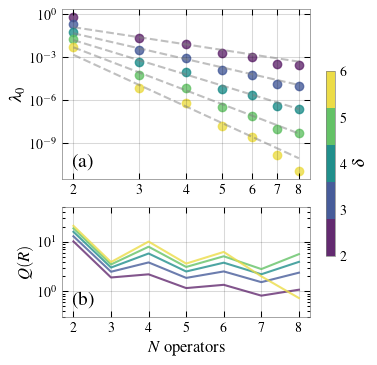

In [12]:
# Plot labels
ax[1].set_xlabel("$N$ operators")

ax[0].set_ylabel("$\lambda_0$")
ax[1].set_ylabel("$Q(R)$")

ax[0].text(0.04, 0.15, '(a)', transform=ax[0].transAxes,
		fontsize=14, va='top')
ax[1].text(0.04, 0.23, '(b)', transform=ax[1].transAxes,
		fontsize=14, va='top')

fig

In [13]:
# fig.tight_layout()
fig.savefig('../drafts/spin_rings_truncations_v0.pdf')
fig.savefig('../drafts/spin_rings_truncations_v0.png')
fig.get_size_inches() * fig.dpi

array([400., 400.])